In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [ ]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6263 entries, 0 to 6262
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      6263 non-null   int64 
 1   ProductId               6263 non-null   object
 2   UserId                  6263 non-null   object
 3   ProfileName             6263 non-null   object
 4   HelpfulnessNumerator    6263 non-null   int64 
 5   HelpfulnessDenominator  6263 non-null   int64 
 6   Score                   6263 non-null   int64 
 7   Time                    6263 non-null   int64 
 8   Summary                 6263 non-null   object
 9   Text                    6262 non-null   object
dtypes: int64(5), object(5)
memory usage: 489.4+ KB


In [ ]:

df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      1
dtype: int64

In [ ]:
# df.dropna()
df['Score'].value_counts()

5    4017
4     844
1     576
3     478
2     348
Name: Score, dtype: int64

<Axes: >

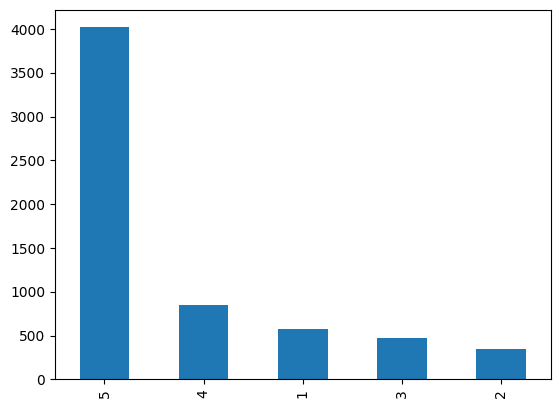

In [ ]:

df['Score'].value_counts().plot(kind='bar')

In [ ]:
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [ ]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [ ]:
!pip install wordcloud

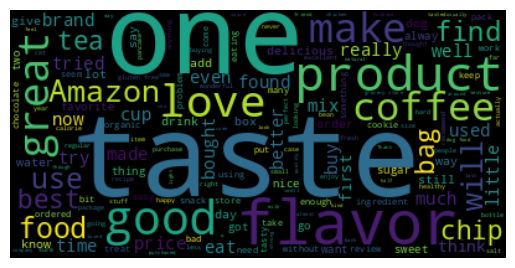

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text if review is not np.nan)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

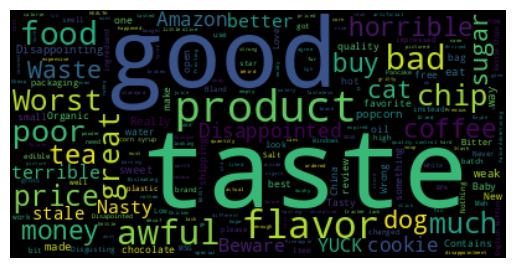

In [ ]:
neg = " ".join(review for review in negative.Summary if review is not np.nan)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,"""Delight"" says it all",1
3,Cough Medicine,-1
4,Great taffy,1


In [ ]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

# Split target and independent variables
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

# Fit model on data
lr.fit(X_train,y_train)

# Make predictions
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 104,   21],
       [ 119, 1012]])

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.47      0.83      0.60       125
           1       0.98      0.89      0.94      1131

    accuracy                           0.89      1256
   macro avg       0.72      0.86      0.77      1256
weighted avg       0.93      0.89      0.90      1256



In [42]:
from sklearn.svm import SVC

In [45]:
model1 = SVC()
model1.fit(X_train, y_train)
predictions1=model1.predict(X_test)

In [46]:

new = np.asarray(y_test)
confusion_matrix(predictions1,y_test)

array([[  78,    9],
       [ 145, 1024]])

In [47]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.35      0.90      0.50        87
           1       0.99      0.88      0.93      1169

    accuracy                           0.88      1256
   macro avg       0.67      0.89      0.72      1256
weighted avg       0.95      0.88      0.90      1256

